Epoch 1/200
264/264 [==============================] - 1s 3ms/step - loss: 0.6879 - accuracy: 0.5519 - val_loss: 0.6865 - val_accuracy: 0.5492
Epoch 2/200
264/264 [==============================] - 1s 2ms/step - loss: 0.6837 - accuracy: 0.5491 - val_loss: 0.6851 - val_accuracy: 0.5421
Epoch 3/200
264/264 [==============================] - 1s 2ms/step - loss: 0.6822 - accuracy: 0.5482 - val_loss: 0.6853 - val_accuracy: 0.5426
Epoch 4/200
264/264 [==============================] - 1s 2ms/step - loss: 0.6815 - accuracy: 0.5472 - val_loss: 0.6850 - val_accuracy: 0.5492
Epoch 5/200
264/264 [==============================] - 1s 2ms/step - loss: 0.6809 - accuracy: 0.5485 - val_loss: 0.6847 - val_accuracy: 0.5431
Epoch 6/200
264/264 [==============================] - 1s 2ms/step - loss: 0.6805 - accuracy: 0.5486 - val_loss: 0.6844 - val_accuracy: 0.5388
Epoch 7/200
264/264 [==============================] - 1s 2ms/step - loss: 0.6798 - accuracy: 0.5535 - val_loss: 0.6850 - val_accuracy: 0.5497

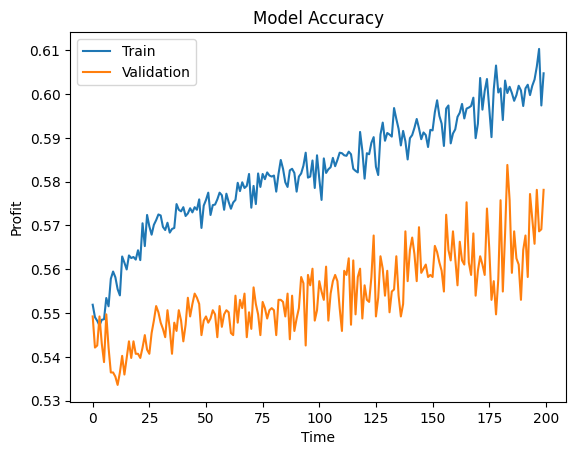

In [9]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Загрузка данных
df = pd.read_csv('applerevenue .csv')

# Вычисление прибыли
df['profit'] = (df['close'] - df['open']) * df['volume']
df['profit'] = df['profit'].apply(lambda x: 1 if x > 0 else 0)  # Преобразование в 1 для положительной прибыли, 0 для отрицательной

# Подготовка данных
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[['open', 'close', 'volume', 'profit']])

X = scaled_data[:, :-1]  # Входные данные (открытие, закрытие и объем)
y = scaled_data[:, -1]  # Целевая переменная (прибыль)

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание модели нейронной сети
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(64, activation='relu', input_shape=(3,)))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# Компиляция модели
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Обучение модели
history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_data=(X_test, y_test))

# Оценка точности модели
_, accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy * 100}%')

# Визуализация точности модели по эпохам
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Profit')
plt.xlabel('Time')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()



Epoch 1/200
264/264 [==============================] - 1s 3ms/step - loss: 0.6850 - accuracy: 0.5504 - val_loss: 0.6850 - val_accuracy: 0.5431
Epoch 2/200
264/264 [==============================] - 1s 2ms/step - loss: 0.6783 - accuracy: 0.5533 - val_loss: 0.6798 - val_accuracy: 0.5426
Epoch 3/200
264/264 [==============================] - 1s 2ms/step - loss: 0.6728 - accuracy: 0.5629 - val_loss: 0.6764 - val_accuracy: 0.5459
Epoch 4/200
264/264 [==============================] - 1s 2ms/step - loss: 0.6703 - accuracy: 0.5641 - val_loss: 0.6757 - val_accuracy: 0.5440
Epoch 5/200
264/264 [==============================] - 1s 2ms/step - loss: 0.6693 - accuracy: 0.5624 - val_loss: 0.6745 - val_accuracy: 0.5464
Epoch 6/200
264/264 [==============================] - 1s 2ms/step - loss: 0.6684 - accuracy: 0.5667 - val_loss: 0.6779 - val_accuracy: 0.5478
Epoch 7/200
264/264 [==============================] - 1s 2ms/step - loss: 0.6668 - accuracy: 0.5718 - val_loss: 0.6817 - val_accuracy: 0.5426

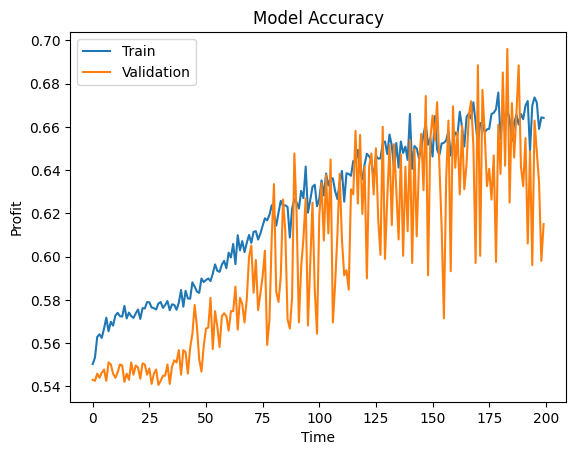

In [10]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Загрузка данных
df = pd.read_csv('applerevenue .csv')

# Вычисление прибыли
df['profit'] = np.where(df['close'] > df['open'], 1, 0)

# Подготовка данных
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[['open', 'close', 'volume', 'profit']])

X = scaled_data[:, :-1]  # Входные данные (открытие, закрытие и объем)
y = scaled_data[:, -1]  # Целевая переменная (прибыль)

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание модели нейронной сети
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(128, activation='relu', input_shape=(3,)))  # Увеличение количества нейронов в слое
model.add(tf.keras.layers.Dense(64, activation='relu'))  # Добавление дополнительного слоя
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# Компиляция модели
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Обучение модели
history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_data=(X_test, y_test))

# Оценка точности модели
_, accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy * 100}%')

# Визуализация точности модели по эпохам
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Profit')
plt.xlabel('Time')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


Epoch 1/200
132/132 [==============================] - 2s 4ms/step - loss: 0.6882 - accuracy: 0.5513 - val_loss: 0.6860 - val_accuracy: 0.5492
Epoch 2/200
132/132 [==============================] - 0s 3ms/step - loss: 0.6827 - accuracy: 0.5523 - val_loss: 0.6835 - val_accuracy: 0.5455
Epoch 3/200
132/132 [==============================] - 1s 5ms/step - loss: 0.6799 - accuracy: 0.5452 - val_loss: 0.6821 - val_accuracy: 0.5497
Epoch 4/200
132/132 [==============================] - 0s 4ms/step - loss: 0.6783 - accuracy: 0.5466 - val_loss: 0.6813 - val_accuracy: 0.5445
Epoch 5/200
132/132 [==============================] - 1s 4ms/step - loss: 0.6761 - accuracy: 0.5550 - val_loss: 0.6805 - val_accuracy: 0.5459
Epoch 6/200
132/132 [==============================] - 1s 4ms/step - loss: 0.6751 - accuracy: 0.5570 - val_loss: 0.6800 - val_accuracy: 0.5473
Epoch 7/200
132/132 [==============================] - 1s 4ms/step - loss: 0.6734 - accuracy: 0.5600 - val_loss: 0.6795 - val_accuracy: 0.5417

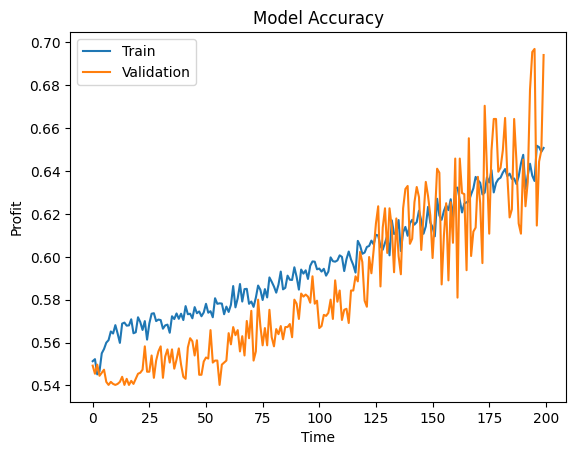

In [11]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Загрузка данных
df = pd.read_csv('applerevenue .csv')

# Вычисление прибыли
df['profit'] = np.where(df['close'] > df['open'], 1, 0)

# Подготовка данных
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[['open', 'close', 'volume', 'profit']])

X = scaled_data[:, :-1]  # Входные данные (открытие, закрытие и объем)
y = scaled_data[:, -1]  # Целевая переменная (прибыль)

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание модели нейронной сети
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(128, activation=tf.keras.layers.LeakyReLU(alpha=0.1), input_shape=(3,)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(64, activation=tf.keras.layers.LeakyReLU(alpha=0.1)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# Компиляция модели с оптимизатором Adamax
model.compile(loss='binary_crossentropy', optimizer='adamax', metrics=['accuracy'])

# Определение ранней остановки
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Обучение модели
history = model.fit(X_train, y_train, epochs=200, batch_size=64, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Оценка точности модели
_, accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy * 100}%')

# Визуализация точности модели по эпохам
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Profit')
plt.xlabel('Time')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


Epoch 1/200
66/66 [==============================] - 2s 14ms/step - loss: 0.6830 - accuracy: 0.5521 - val_loss: 0.6797 - val_accuracy: 0.5426
Epoch 2/200
66/66 [==============================] - 1s 11ms/step - loss: 0.6730 - accuracy: 0.5563 - val_loss: 0.6771 - val_accuracy: 0.5412
Epoch 3/200
66/66 [==============================] - 1s 9ms/step - loss: 0.6703 - accuracy: 0.5579 - val_loss: 0.6728 - val_accuracy: 0.5421
Epoch 4/200
66/66 [==============================] - 0s 7ms/step - loss: 0.6687 - accuracy: 0.5595 - val_loss: 0.6721 - val_accuracy: 0.5421
Epoch 5/200
66/66 [==============================] - 0s 7ms/step - loss: 0.6667 - accuracy: 0.5706 - val_loss: 0.6727 - val_accuracy: 0.5407
Epoch 6/200
66/66 [==============================] - 0s 7ms/step - loss: 0.6657 - accuracy: 0.5651 - val_loss: 0.6718 - val_accuracy: 0.5341
Epoch 7/200
66/66 [==============================] - 0s 6ms/step - loss: 0.6647 - accuracy: 0.5694 - val_loss: 0.6740 - val_accuracy: 0.5445
Epoch 8/200

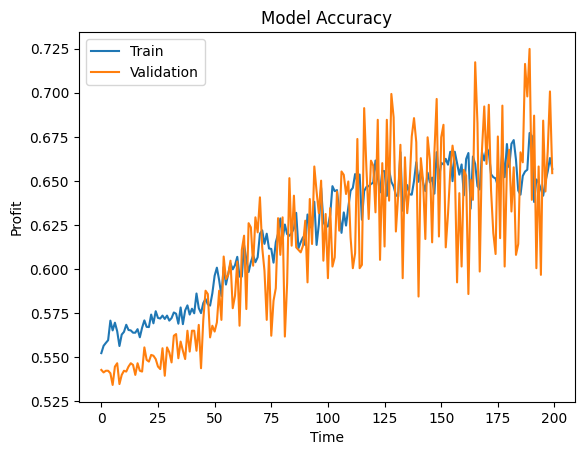

In [12]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Загрузка данных
df = pd.read_csv('applerevenue .csv')

# Вычисление прибыли
df['profit'] = np.where(df['close'] > df['open'], 1, 0)

# Подготовка данных
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[['open', 'close', 'volume', 'profit']])

X = scaled_data[:, :-1]  # Входные данные (открытие, закрытие и объем)
y = scaled_data[:, -1]  # Целевая переменная (прибыль)

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание модели нейронной сети
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(128, activation=tf.keras.layers.LeakyReLU(alpha=0.1), input_shape=(3,)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(256, activation=tf.keras.layers.LeakyReLU(alpha=0.1)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(128, activation=tf.keras.layers.LeakyReLU(alpha=0.1)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# Компиляция модели с оптимизатором AdamW и L2 регуляризацией
optimizer = tf.keras.optimizers.AdamW(learning_rate=0.001)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Определение ранней остановки
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=300, restore_best_weights=True)

# Обучение модели с увеличенным количеством эпох
history = model.fit(X_train, y_train, epochs=200, batch_size=128, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Оценка точности модели
_, accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy * 100}%')

# Визуализация точности модели по эпохам
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Profit')
plt.xlabel('Time')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


Epoch 1/100
66/66 [==============================] - 2s 9ms/step - loss: 0.6879 - accuracy: 0.5426 - val_loss: 0.6826 - val_accuracy: 0.5568
Epoch 2/100
66/66 [==============================] - 0s 6ms/step - loss: 0.6863 - accuracy: 0.5443 - val_loss: 0.6818 - val_accuracy: 0.5592
Epoch 3/100
66/66 [==============================] - 0s 7ms/step - loss: 0.6873 - accuracy: 0.5477 - val_loss: 0.6829 - val_accuracy: 0.5540
Epoch 4/100
66/66 [==============================] - 0s 6ms/step - loss: 0.6864 - accuracy: 0.5454 - val_loss: 0.6822 - val_accuracy: 0.5625
Epoch 5/100
66/66 [==============================] - 0s 6ms/step - loss: 0.6864 - accuracy: 0.5415 - val_loss: 0.6813 - val_accuracy: 0.5549
Epoch 6/100
66/66 [==============================] - 0s 6ms/step - loss: 0.6856 - accuracy: 0.5452 - val_loss: 0.6815 - val_accuracy: 0.5663
Epoch 7/100
66/66 [==============================] - 1s 9ms/step - loss: 0.6859 - accuracy: 0.5459 - val_loss: 0.6817 - val_accuracy: 0.5616
Epoch 8/100
6

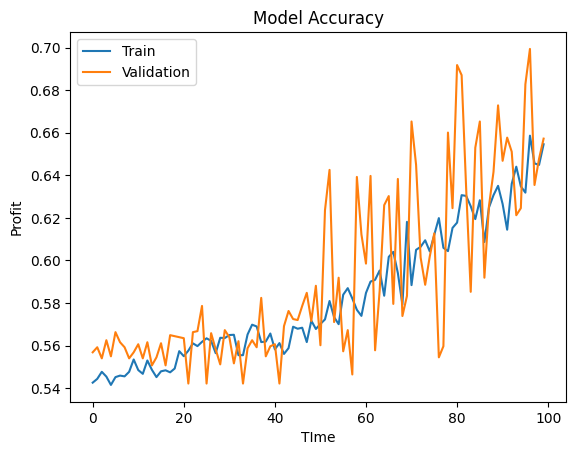

In [14]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Загрузка данных
df = pd.read_csv('applerevenue .csv')

# Вычисление прибыли
df['profit'] = np.where(df['close'] > df['open'], 1, 0)

# Подготовка данных
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[['open', 'close', 'volume', 'profit']])

X = scaled_data[:, :-1]  # Входные данные (открытие, закрытие и объем)
y = scaled_data[:, -1]  # Целевая переменная (прибыль)

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=38)

# Создание модели нейронной сети
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(128, activation='tanh', kernel_initializer='glorot_uniform', input_shape=(3,)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(256, activation='tanh', kernel_initializer='glorot_uniform'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(128, activation='tanh', kernel_initializer='glorot_uniform'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# Компиляция модели с оптимизатором Adam и L2 регуляризацией
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Определение ранней остановки
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=100, restore_best_weights=True)

# Обучение модели с увеличенным количеством эпох
history = model.fit(X_train, y_train, epochs=100, batch_size=128, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Оценка точности модели
_, accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy * 100}%')

# Визуализация точности модели по эпохам
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Profit')
plt.xlabel('TIme')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
